In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/timeseries_data.csv', index_col=0)
data.shape

(32699, 25)

In [3]:
data.head()

institution  visit_count inst_type  \
date                                                                      
2021-01-07  01811bcf-ec5b-4a02-a64a-0ac551f9d0ac           14    clinic   
2021-01-08  01811bcf-ec5b-4a02-a64a-0ac551f9d0ac           12    clinic   
2021-01-09  01811bcf-ec5b-4a02-a64a-0ac551f9d0ac            9    clinic   
2021-01-10  01811bcf-ec5b-4a02-a64a-0ac551f9d0ac            9    clinic   
2021-01-11  01811bcf-ec5b-4a02-a64a-0ac551f9d0ac           11    clinic   

            no_unique_patients  no_out_patients  no_in_patients  in_out_ratio  \
date                                                                            
2021-01-07                  14                0              14           0.0   
2021-01-08                  12                0              12           0.0   
2021-01-09                   9                0               9           0.0   
2021-01-10                   9                0               9           0.0   
2021-01-11                  11                0              11           0.0   

              avg_age  avg_male_age  avg_female_age  ...  year  month  day  \
date                                                 ...                     
2021-01-07  39.642857           0.0       39.642857  ...  2021      1    7   
2021-01-08  36.750000           0.0       36.750000  ...  2021      1    8   
2021-01-09  41.777778           0.0       41.777778  ...  2021      1    9   
2021-01-10  41.777778           0.0       41.777778  ...  2021      1   10   
2021-01-11  39.818182           0.0       39.818182  ...  2021      1   11   

            dayofweek  lag_1  lag_2  lag_3    t1    t2    t3  
date                                                          
2021-01-07          3   16.0   12.0   12.0  12.0   9.0   9.0  
2021-01-08          4   14.0   16.0   12.0   9.0   9.0  11.0  
2021-01-09          5   12.0   14.0   16.0   9.0  11.0  17.0  
2021-01-10          6    9.0   12.0   14.0  11.0  17.0  10.0  
2021-01-11          0    9.0    9.0   12.0  17.0  10.0  14.0  

[5 rows x 25 columns]

In [4]:
data.columns

Index(['institution', 'visit_count', 'inst_type', 'no_unique_patients',
       'no_out_patients', 'no_in_patients', 'in_out_ratio', 'avg_age',
       'avg_male_age', 'avg_female_age', 'max_age', 'min_age', 'no_male',
       'no_female', 'no_unique_states', 'year', 'month', 'day', 'dayofweek',
       'lag_1', 'lag_2', 'lag_3', 't1', 't2', 't3'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32699 entries, 2021-01-07 to 2021-05-31
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   institution         32699 non-null  object 
 1   visit_count         32699 non-null  int64  
 2   inst_type           32699 non-null  object 
 3   no_unique_patients  32699 non-null  int64  
 4   no_out_patients     32699 non-null  int64  
 5   no_in_patients      32699 non-null  int64  
 6   in_out_ratio        32699 non-null  float64
 7   avg_age             32699 non-null  float64
 8   avg_male_age        32699 non-null  float64
 9   avg_female_age      32699 non-null  float64
 10  max_age             32699 non-null  float64
 11  min_age             32699 non-null  float64
 12  no_male             32699 non-null  int64  
 13  no_female           32699 non-null  int64  
 14  no_unique_states    32699 non-null  int64  
 15  year                32699 non-null  int64  


In [6]:
data.describe()

visit_count  no_unique_patients  no_out_patients  no_in_patients  \
count  32699.000000        32699.000000     32699.000000    32699.000000   
mean      14.292394           14.217897         0.559956       13.732438   
std       20.948349           20.872178         1.408506       20.115881   
min        1.000000            1.000000         0.000000        0.000000   
25%        2.000000            2.000000         0.000000        2.000000   
50%        7.000000            7.000000         0.000000        7.000000   
75%       17.000000           17.000000         1.000000       17.000000   
max      633.000000          633.000000        31.000000      633.000000   

       in_out_ratio       avg_age  avg_male_age  avg_female_age       max_age  \
count  32699.000000  32699.000000  32699.000000    32699.000000  32699.000000   
mean       3.978654     37.505654     31.109091       32.093896     57.903055   
std       10.107323     14.544025     20.765963       18.396323     21.328113   
min        0.000000      2.000000      0.000000        0.000000      2.000000   
25%        0.000000     31.000000     12.000000       25.000000     44.000000   
50%        0.000000     36.488372     34.000000       34.500000     59.000000   
75%        1.500000     44.000000     44.310096       42.000000     74.000000   
max      147.000000    119.000000    119.000000      102.000000    124.000000   

            min_age  ...     year         month           day     dayofweek  \
count  32699.000000  ...  32699.0  32699.000000  32699.000000  32699.000000   
mean      19.818160  ...   2021.0      6.217988     15.788862      3.007615   
std       18.124381  ...      0.0      3.059556      8.688995      2.000467   
min       -5.000000  ...   2021.0      1.000000      1.000000      0.000000   
25%        4.000000  ...   2021.0      4.000000      8.000000      1.000000   
50%       14.000000  ...   2021.0      6.000000     16.000000      3.000000   
75%       31.000000  ...   2021.0      9.000000     23.000000      5.000000   
max      119.000000  ...   2021.0     11.000000     31.000000      6.000000   

              lag_1         lag_2         lag_3            t1            t2  \
count  32699.000000  32699.000000  32699.000000  32699.000000  32699.000000   
mean      14.288082     14.272975     14.244809     14.307227     14.320927   
std       20.930685     20.914755     20.893256     20.984442     21.011265   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        7.000000      7.000000      7.000000      7.000000      7.000000   
75%       17.000000     17.000000     17.000000     17.000000     17.000000   
max      633.000000    633.000000    633.000000    633.000000    633.000000   

                 t3  
count  32699.000000  
mean      14.319306  
std       21.015159  
min        1.000000  
25%        2.000000  
50%        7.000000  
75%       17.000000  
max      633.000000  

[8 rows x 23 columns]

In [7]:
data[data.visit_count==633]

institution  visit_count inst_type  \
date                                                                      
2021-02-07  9367d62f-6b99-46f8-8505-719e829ad667          633  hospital   

            no_unique_patients  no_out_patients  no_in_patients  in_out_ratio  \
date                                                                            
2021-02-07                 633                0             633           0.0   

              avg_age  avg_male_age  avg_female_age  ...  year  month  day  \
date                                                 ...                     
2021-02-07  49.581359     50.237288       49.008876  ...  2021      2    7   

            dayofweek  lag_1  lag_2  lag_3    t1     t2     t3  
date                                                            
2021-02-07          6    1.0   15.0   15.0  11.0  229.0  229.0  

[1 rows x 25 columns]

<Axes: xlabel='date', ylabel='visit_count'>

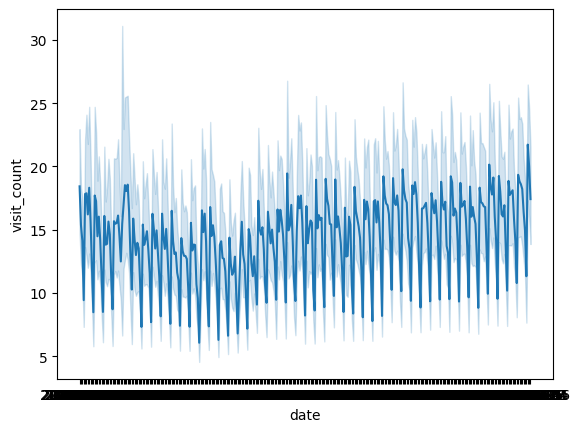

In [8]:
sns.lineplot(data=data, y='visit_count', x=data.index)

In [9]:
data.institution.value_counts()

institution
7b71b487-8a7a-48ad-a817-0eb5b692bfe2    329
33ca2840-08b5-4a3d-bad4-da63350becd9    329
355cd89d-faa1-4620-8857-a05a24b513e3    329
658e24af-453e-4824-a049-5346a5e25964    329
c2dc34b5-7a9b-4dcb-85ae-b3b6c23d823e    329
                                       ... 
609f1e03-6110-49e7-b2b5-594602e28e03     17
214944c2-c52c-454c-aa66-95f68f7c23f5     16
34b68d87-fd38-4d02-a4d1-46d902d012a7     15
6d6aff85-bac4-4a77-a5d7-f03c780c27d5     13
c63b0053-b738-4e39-b417-f298998d6c4a      7
Name: count, Length: 130, dtype: int64

### Outliers

<Axes: xlabel='visit_count', ylabel='no_out_patients'>

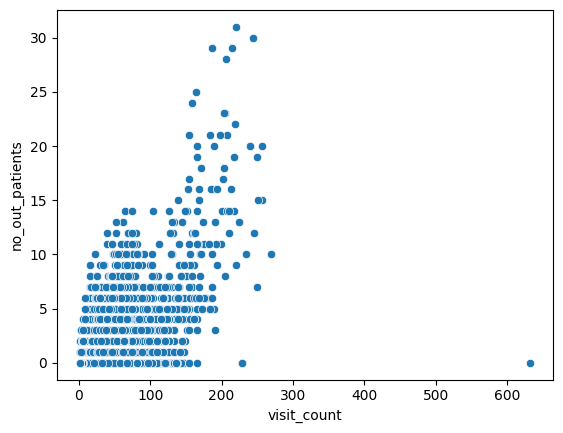

In [10]:
sns.scatterplot(data=data, x='visit_count', y='no_out_patients')

<Axes: xlabel='visit_count', ylabel='in_out_ratio'>

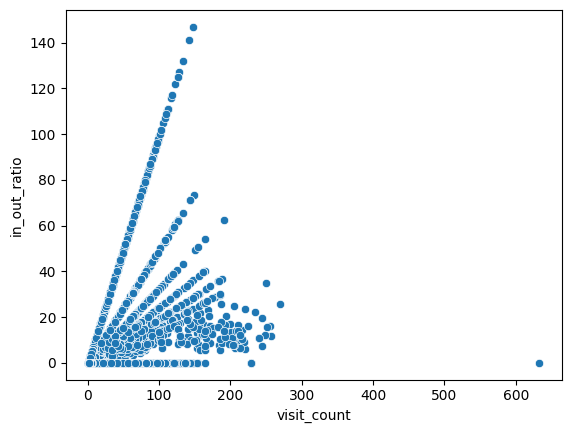

In [11]:
sns.scatterplot(data=data, x='visit_count', y='in_out_ratio')

<Axes: xlabel='visit_count', ylabel='avg_age'>

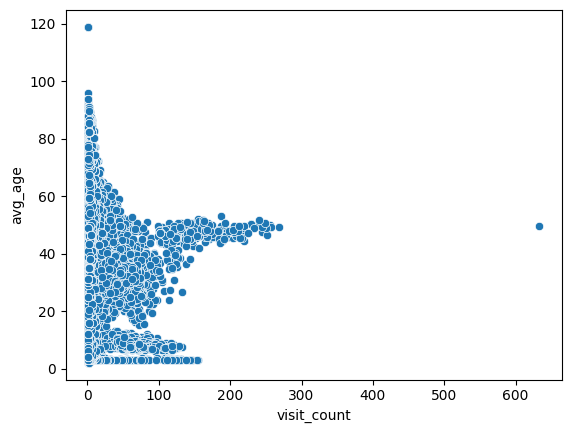

In [12]:
sns.scatterplot(data=data, x='visit_count', y='avg_age')

### Distributions and Association

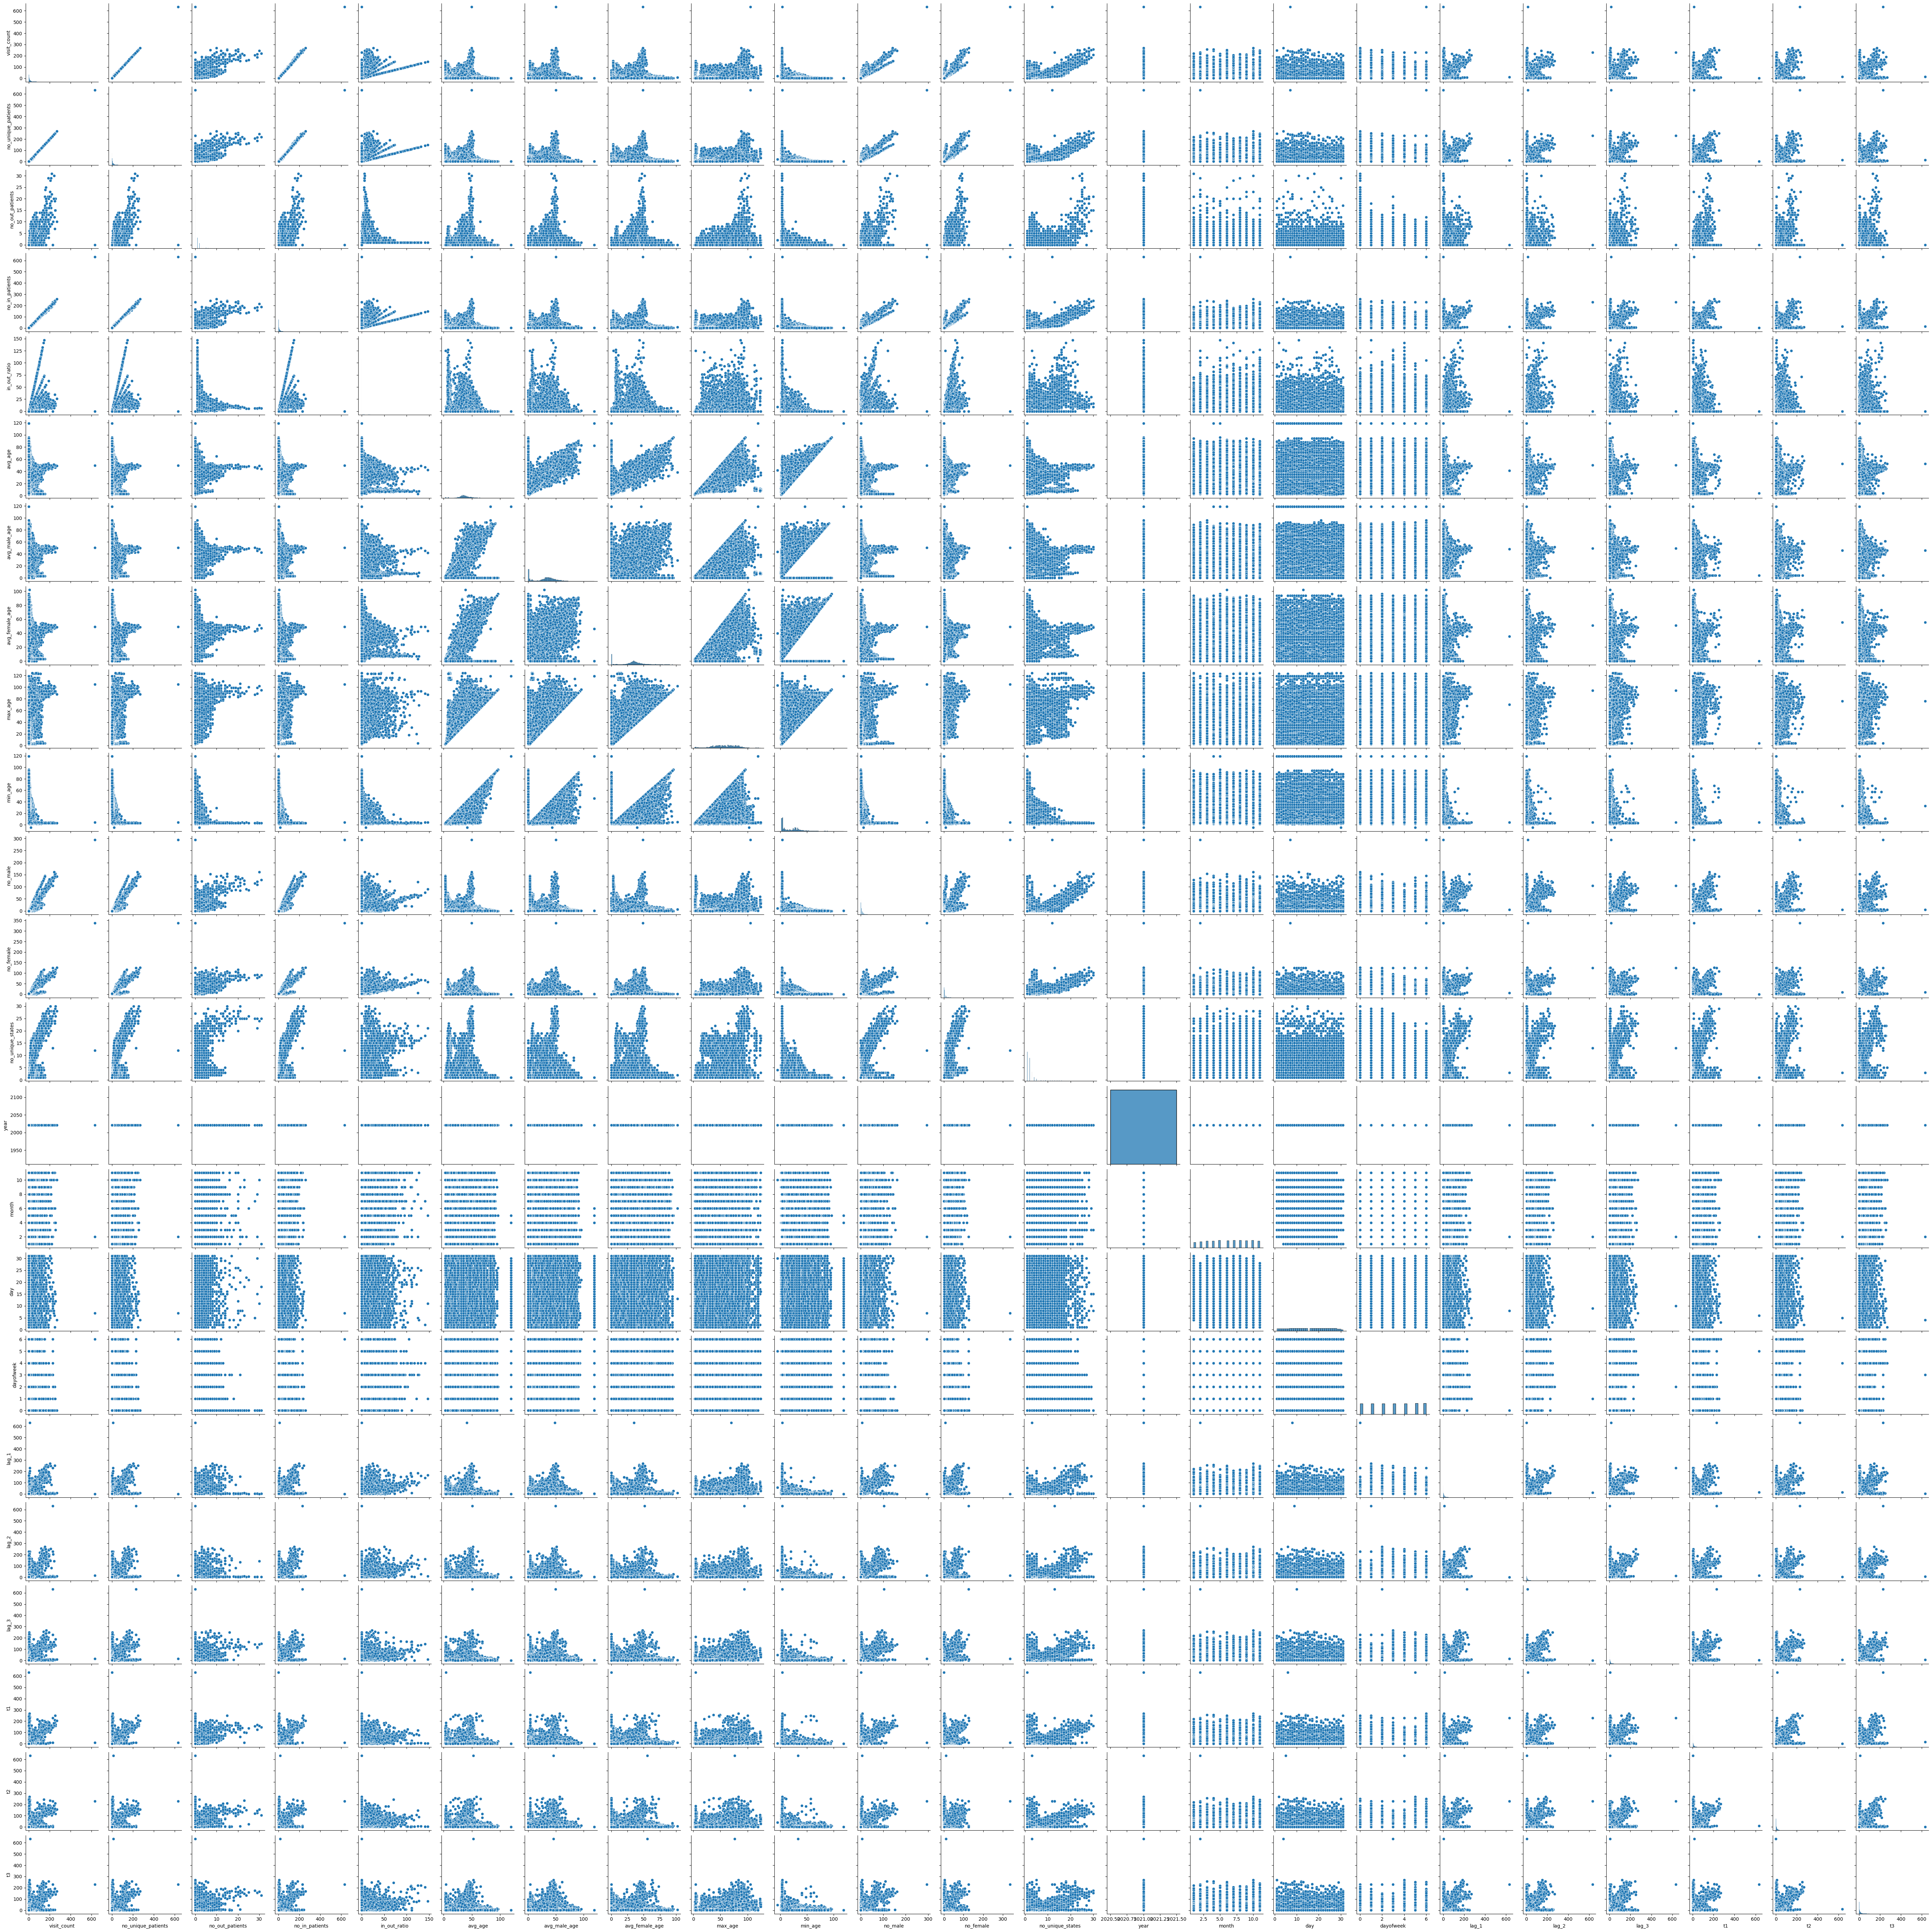

In [13]:
sns.pairplot(data)

### Correlation

<Axes: >

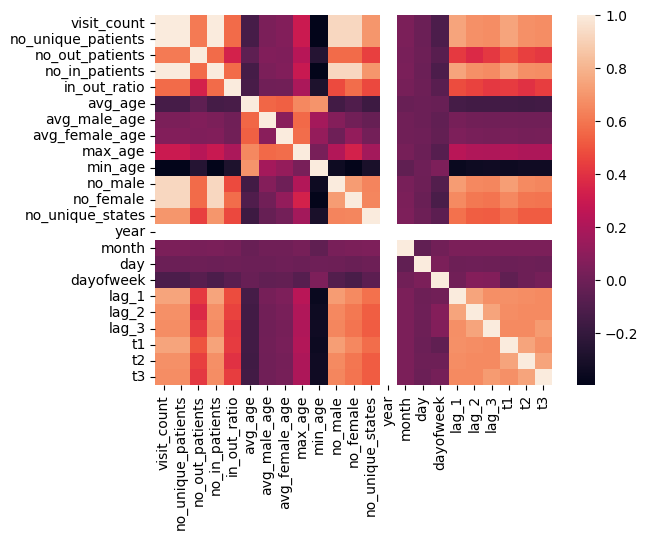

In [15]:
sns.heatmap(data.drop("inst_type", axis=1).iloc[:, 1:].corr())

<Axes: xlabel='visit_count', ylabel='min_age'>

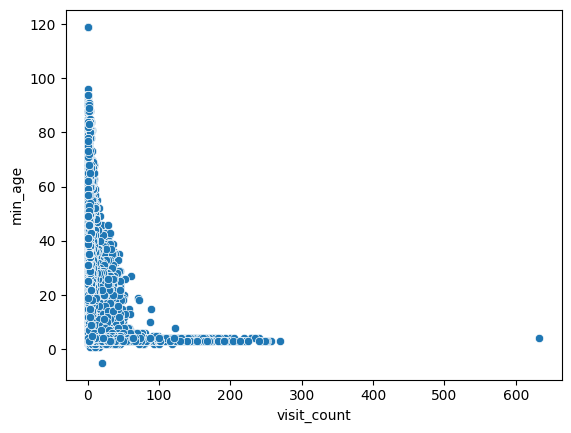

In [16]:
sns.scatterplot(data=data, x='visit_count', y='min_age')

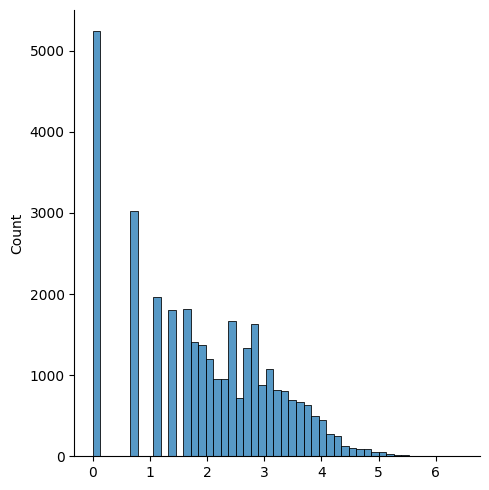

In [17]:
sns.displot(np.log(data['visit_count'].values))

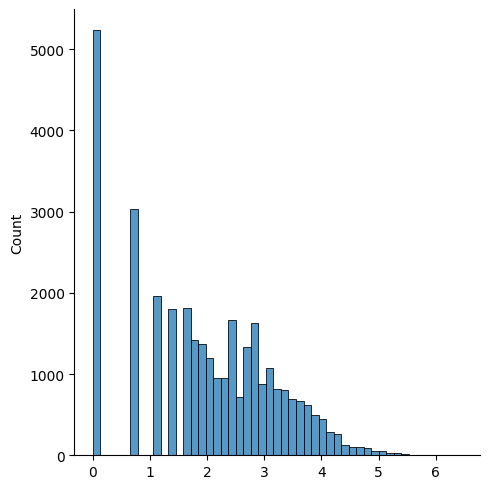

In [18]:
sns.displot(np.log(data['t1'].values))